In [12]:
!pip install nltk

In [13]:
import nltk


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle
import pandas as pd
import numpy as np
import re

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
df = pd.read_json(r"C:\Users\samse\Untitled Folder 1\IMDB_reviews.json\IMDB_reviews.json", lines=True)
df
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [22]:
df.review_date

0         10 February 2006
1         6 September 2000
2            3 August 2001
3         1 September 2002
4              20 May 2004
                ...       
573908       8 August 1999
573909        31 July 1999
573910        20 July 1999
573911        11 June 1999
573912          3 May 1999
Name: review_date, Length: 573913, dtype: object

In [23]:
def seperate_reviews(df, count_reviews):
  spoiler_sum = df['is_spoiler'].sum()   # Number of spoilers in the dataset
  fraction_spoiler_postive = num_reviews/spoiler_sum  # fraction of spoiler reviews to be returned
  fraction_spoiler_negative = num_reviews/(df.shape[0] - num_pos_reviews)  # fraction of non-spoiler reviews to be returned 

  df_is_spoiler = df[df['is_spoiler']]['review_text'].sample(frac = fraction_pos, random_state = 2)
  df_not_spoiler = df[df['is_spoiler'] == False]['review_text'].sample(frac = fraction_neg, random_state = 2)

  df_reviews = pd.concat([df_is_spoiler, df_not_spoiler])
  df_reviews = df_reviews.reset_index(drop=True)
  labels = [1]*(count_reviews*2)
  print(len(labels))
  labeled_col[count_reviews:] = [0]*count_reviews

  return df_reviews, labeled_col

In [24]:
df_reviews, labels = seperate_reviews(df, 5000)
labels

10000


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_reviews, labels, test_size=0.1, random_state=21, stratify=labels)

In [26]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((9000,), (1000,), 9000, 1000)

In [27]:
def get_vector_from_features(X, min_df=0, stop_words=False, ngram_range=(1,1), verbose = True, tokenizer=None, binary=False):
  vectors = CountVectorizer(min_df=min_df, stop_words = "english" if stop_words else None, ngram_range=ngram_range, tokenizer=tokenizer, binary=binary)
  vectors.fit(X)                                             # Create the vocabulary of words for the given reviews dataset

  print("Vocabulary size: {}".format(len(vect.vocabulary_)))

  if verbose:
    feature_names = vect.get_feature_names()
    print("Number of features: {}".format(len(feature_names)))
    print("First 20 features:\n{}".format(feature_names[:20]))
    print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
    print("Every 2000th feature:\n{}".format(feature_names[::2000]))

  bag_of_words = vectors.transform(X)               # Transform the reviews into feature vector
  bag_of_words_norm = normalize(bag_of_words, norm='l2')  # Normalize the feature vectors obtained

  return bag_of_words_norm, vectors

In [28]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    print("Training accuracy: " + str(model.score(X_train, y_train)))
    print("Testing accuracy: " + str(model.score(X_test, y_test)))
    y_pred = model.predict(X_test)
    print("Precision on test data: " + str(precision_score(y_test, y_pred)))
    print("Recall on test data: " + str(recall_score(y_test, y_pred)))
    print("f1 score on test data: " + str(f1_score(y_test, y_pred)))

In [29]:
def tune_parameters(model, X_train, y_train, param_grid, verbose=False, cv=5):
    clf = GridSearchCV(model, param_grid=param_grid, cv=cv, n_jobs=-1, return_train_score=True)
    clf.fit(X_train, y_train)
    results = clf.cv_results_

    if verbose:
        plt.figure()
        plt.plot(results['param_C'], results['mean_train_score'])
        plt.plot(results['param_C'], results['mean_test_score'])
        plt.xlabel(list(param_grid.keys())[0])
        plt.ylabel("Accuracy")
        plt.show()

    return clf

In [30]:
ss = ShuffleSplit(n_splits=1, test_size=0.20, random_state=0)

In [31]:
bag_of_words_norm, vect = get_vector_from_features(X_train)

Vocabulary size: 48672
Number of features: 48672
First 20 features:
['00', '000', '0000000', '0001', '000usd', '007', '00s', '00t', '01', '01100011', '01101100', '01110101', '01111001', '02', '03', '04', '045', '05', '06', '07']
Features 20010 to 20030:
['heiglit', 'heil', 'heinlei', 'heinlein', 'heinous', 'heinously', 'heinreich', 'heinrich', 'heinrichs', 'heir', 'heiress', 'heirloom', 'heirs', 'heisserer', 'heist', 'heists', 'hejira', 'hela', 'helander', 'held']
Every 2000th feature:
['00', 'als', 'barbarity', 'brin', 'chuck', 'cowardice', 'didlaugh', 'elena', 'fedora', 'gerd', 'heidelberg', 'infinity', 'kimball', 'm203', 'mlk', 'obstructions', 'persona', 'psychopaths', 'resputin', 'scupper', 'socialists', 'superimposed', 'torso', 'using', 'woolsey']


In [32]:
bag_of_words_test = vect.transform(X_test)
bag_of_words_test_norm = normalize(bag_of_words_test, norm='l2')
bag_of_words_test_norm

<1000x48672 sparse matrix of type '<class 'numpy.float64'>'
	with 153846 stored elements in Compressed Sparse Row format>

In [33]:
parameters = {'C': [0.01, 0.1, 1.0, 10], 'gamma' : [1, 5, 10]}
svm = SVC(kernel="rbf")
grid_search = tune_parameters(svm, bag_of_words_norm, y_train, parameters, cv=ss)

In [34]:
svm_best = grid_search.best_estimator_
evaluate_model(svm_best, bag_of_words_norm, bag_of_words_test_norm, y_train, y_test)

Training accuracy: 0.8108888888888889
Testing accuracy: 0.674
Precision on test data: 0.6827731092436975
Recall on test data: 0.65
f1 score on test data: 0.665983606557377


In [35]:
grid_search.best_params_

{'C': 1.0, 'gamma': 1}

In [36]:
filename = '1.4_GridSearchCV.sav'
pickle.dump(grid_search, open(filename, 'wb'))

In [37]:
def process_text(review):
    review = review.lower()           # convert to lowercase

    review = re.sub("[^a-zA-Z#]", " ", review)    # Replace numbers, characters with space

    regex = re.compile('(?u)\\b\\w\\w+\\b')       # Break each sentence on the basis of punctuations, white spaces
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(WordNetLemmatizer().lemmatize(token, pos='v')) for token in regex.findall(review)])

In [38]:
df_reviews = pd.Series([process_text(review) for review in df_reviews])

In [39]:
df_reviews.reset_index(drop=True, inplace=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_reviews, labels, test_size=0.1, random_state=21, stratify=labels)

In [41]:
X_test.shape


(1000,)

In [42]:
X_train.index

Int64Index([1276, 9284, 5946, 1395, 6367, 4582, 6695, 6030, 9444, 8193,
            ...
            5684, 4476, 8264, 7860,  431, 4973, 3832, 4113, 4723, 8882],
           dtype='int64', length=9000)

In [43]:
X_train_in = X_train.reset_index(drop=True)

In [44]:
reviews = pd.DataFrame({'review_text': X_train_in, 'labels': y_train})

In [45]:
reviews

,review_text,labels
0,possibl spoilersth whole movi be great until a...,1
1,let me start by say thi that have be one of th...,0
2,just don know be energ by all the hype for thi...,0
3,dare to say thi be the worst movi ve ever see ...,1
4,the th wave be american scienc fiction thrille...,0
...,...,...
8995,those that have not yet see room have not see ...,1
8996,the film have some great comed actor in it inc...,1
8997,from someon who have watch both film find thi ...,1
8998,tri not to be bia when stand in my local video...,1


In [46]:
vect = CountVectorizer(stop_words="english", binary=True)
vect.fit(reviews[reviews['labels']==1]['review_text'])

CountVectorizer(binary=True, stop_words='english')

In [47]:
bag_of_words_spoiler = vect.transform(reviews[reviews['labels']==1]['review_text'])
freq_spoiler = bag_of_words_spoiler.sum(axis=0)

In [48]:
freq_spoiler

matrix([[2, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [49]:
bag_of_words_spoiler

<4500x25017 sparse matrix of type '<class 'numpy.int64'>'
	with 540150 stored elements in Compressed Sparse Row format>

In [50]:
freq_spoiler.shape

(1, 25017)

In [51]:
freq_spoiler = np.ravel(freq_spoiler)

In [52]:
freq_spoiler

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
freq_spoiler.shape

(25017,)

In [54]:
freq_spoiler

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
freq_spoiler.sum()

540150

In [56]:
freq_spoiler_norm = freq_spoiler/np.linalg.norm(freq_spoiler)

In [57]:
freq_spoiler_norm.sum()

32.41990911184031

In [58]:
bag_of_words_non_spoiler = vect.transform(reviews[reviews['labels']==0]['review_text'])
freq_non_spoiler = bag_of_words_non_spoiler.sum(axis=0)

In [59]:
bag_of_words_non_spoiler

<4500x25017 sparse matrix of type '<class 'numpy.int64'>'
	with 383643 stored elements in Compressed Sparse Row format>

In [60]:
freq_non_spoiler.shape

(1, 25017)

In [61]:
freq_non_spoiler = np.ravel(freq_non_spoiler)
freq_non_spoiler.shape

(25017,)

In [63]:
freq_non_spoiler_norm = freq_non_spoiler/np.linalg.norm(freq_non_spoiler)

In [64]:
freq_non_spoiler_norm.sum()

28.673400345670462

In [65]:
freq_non_spoiler

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
np.abs(freq_spoiler - freq_non_spoiler).max()

744

In [69]:
(np.abs(freq_spoiler - freq_non_spoiler) > 100).sum()

271

In [70]:
np.where(np.abs(freq_spoiler - freq_non_spoiler) > 100)

(array([   53,   112,   167,   173,   181,   196,   339,   572,   594,
          779,   809,   817,   882,   924,   930,  1169,  1265,  1296,
         1399,  1488,  1706,  1832,  1842,  1871,  1878,  1920,  2049,
         2090,  2173,  2372,  2576,  2660,  2746,  2813,  2901,  3244,
         3264,  3353,  3395,  3579,  3601,  3762,  3944,  4263,  4332,
         4511,  4551,  4699,  4727,  4732,  4831,  5069,  5262,  5286,
         5313,  5354,  5625,  5732,  5734,  5747,  5828,  5844,  5880,
         6061,  6107,  6452,  6532,  6765,  6827,  6876,  6959,  7074,
         7162,  7168,  7177,  7186,  7211,  7269,  7286,  7342,  7367,
         7381,  7397,  7424,  7439,  7479,  7537,  7602,  7625,  7727,
         7742,  7762,  8016,  8055,  8259,  8595,  8756,  8859,  8929,
         9242,  9290,  9336,  9374,  9473,  9520,  9563,  9565,  9576,
         9723,  9753,  9848,  9872,  9943,  9977, 10121, 10154, 10279,
        10280, 10296, 10335, 10348, 10500, 10654, 10728, 10984, 11220,
      

In [71]:
good_words = pd.Series(vect.get_feature_names()).iloc[np.abs(freq_spoiler_norm - freq_non_spoiler_norm) > 0.01]

In [72]:
good_words

178        actor
1871       befor
1878       begin
2026        best
4263        come
5313       death
5734         die
6876         end
6919       enjoy
7742        film
7762       final
8929        good
9117       great
9563      happen
9977          hi
11927       kill
12050       know
12473       leav
13334        man
14511       movi
16319    perform
16766      point
19048       save
19117      scene
20710    spoiler
20909      start
22099        thi
22620        tri
22783       turn
23519        use
24329        whi
dtype: object

In [73]:
words = pd.Series(vect.get_feature_names()).iloc[np.abs(freq_spoiler - freq_non_spoiler) > 100]
vocabulary = {key : value for value, key in enumerate(words)}
vocabulary_good = {key : value for value, key in enumerate(words_good)}
vocabulary_good['turn'], vocabulary_good['end']

(28, 7)

In [74]:
vect_1 = CountVectorizer(vocabulary=vocabulary_good)
vect_1.fit(X_train)

CountVectorizer(vocabulary={'actor': 0, 'befor': 1, 'begin': 2, 'best': 3,
                            'come': 4, 'death': 5, 'die': 6, 'end': 7,
                            'enjoy': 8, 'film': 9, 'final': 10, 'good': 11,
                            'great': 12, 'happen': 13, 'hi': 14, 'kill': 15,
                            'know': 16, 'leav': 17, 'man': 18, 'movi': 19,
                            'perform': 20, 'point': 21, 'save': 22, 'scene': 23,
                            'spoiler': 24, 'start': 25, 'thi': 26, 'tri': 27,
                            'turn': 28, 'use': 29, ...})

In [75]:
bag_of_words = vect_1.transform(X_train)
bag_of_words
bag_of_words_norm = normalize(bag_of_words)
bag_of_words_norm

<9000x31 sparse matrix of type '<class 'numpy.float64'>'
	with 74719 stored elements in Compressed Sparse Row format>

In [76]:
bag_of_words_norm

<9000x31 sparse matrix of type '<class 'numpy.float64'>'
	with 74719 stored elements in Compressed Sparse Row format>

In [77]:
bag_of_words_norm_dense = bag_of_words.todense()
bag_of_words_norm_dense.shape

(9000, 31)

In [78]:
bag_of_words_norm_dense[:, 24].shape

(9000, 1)

In [79]:
bag_of_words_test = vect_1.transform(X_test)
bag_of_words_test
bag_of_words_test_norm = normalize(bag_of_words_test)
bag_of_words_test_norm

<1000x31 sparse matrix of type '<class 'numpy.float64'>'
	with 8162 stored elements in Compressed Sparse Row format>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


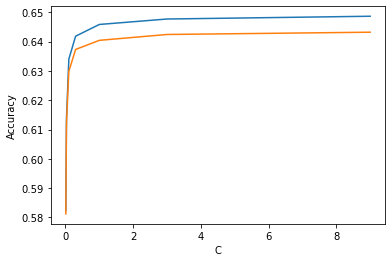

In [80]:
parameters = {'C': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 9.0]}
svm = LinearSVC(C=10, loss='hinge', max_iter=10000)
grid_search = tune_parameters(svm, bag_of_words_norm, y_train, parameters, verbose=True)

In [81]:
svm = SVC(kernel="rbf", gamma=1, C=1)
svm.fit(bag_of_words_norm, y_train)

SVC(C=1, gamma=1)

In [82]:
model = evaluate_model(svm, bag_of_words_norm, bag_of_words_test_norm, y_train, y_test)

Training accuracy: 0.6851111111111111
Testing accuracy: 0.626
Precision on test data: 0.6582914572864321
Recall on test data: 0.524
f1 score on test data: 0.5835189309576837


In [84]:
text_input = """ after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were "just happy to be nominated." Of course hindsight is 20/20, but while history looks back on Gump as a good film, Pulp and Redemption are remembered as some of the all-time best. Pulp, however, was a success from the word "go," making a huge splash at Cannes and making its writer-director an American master after only two films. For Andy Dufresne and Co., success didn't come easy. Fortunately, failure wasn't a life sentence.After opening on 33 screens with take of $727,327, the $25M film fell fast from theatres and finished with a mere $28.3M. The reasons for failure are many. Firstly, the title is a clunker. While iconic to fans today, in 1994, people knew not and cared not what a 'Shawshank' was. On the DVD, Tim Robbins laughs recounting fans congratulating him on "that 'Rickshaw' movie." Marketing-wise, the film's a nightmare, as 'prison drama' is a tough sell to women, and the story of love between two best friends doesn't spell winner to men. Worst of all, the movie is slow as molasses. As Desson Thomson writes for the Washington Post, "it wanders down subplots at every opportunity and ignores an abundance of narrative exit points before settling on its finale." But it is these same weaknesses that make the film so strong.Firstly, its setting. The opening aerial shots of the prison are a total eye-opener. This is an amazing piece of architecture, strong and Gothic in design. Immediately, the prison becomes a character. It casts its shadow over most of the film, its tall stone walls stretching above every shot. It towers over the men it contains, blotting out all memories of the outside world. Only Andy (Robbins) holds onto hope. It's in music, it's in the sandy beaches of Zihuatanejo; "In here's where you need it most," he says. "You need it so you don't forget. Forget that there are places in the world that aren't made out of stone. That there's a - there's a - there's something inside that's yours, that they can't touch." Red (Morgan Freeman) doesn't think much of Andy at first, picking "that tall glass o' milk with the silver spoon up his ass" as the first new fish to crack. Andy says not a word, and losing his bet, Red resents him for it. But over time, as the two get to know each other, they quickly become the best of friends. This again, is one of the film's major strengths. Many movies are about love, many flicks have a side-kick to the hero, but Shawshank is the only one I can think of that looks honestly at the love between two best friends. It seems odd that Hollywood would skip this relationship time and again, when it's a feeling that weighs so much into everyone's day to day lives. Perhaps it's too sentimental to seem conventional, but Shawshank's core friendship hits all the right notes, and the film is much better for it.It's pacing is deliberate as well. As we spend the film watching the same actors, it is easy to forget that the movie's timeline spans well over 20 years. Such a huge measure of time would pass slowly in reality, and would only be amplified in prison. And it's not as if the film lacks interest in these moments. It still knows where it's going, it merely intends on taking its sweet time getting there. It pays off as well, as the tedium of prison life makes the climax that much more exhilarating. For anyone who sees it, it is a moment never to be forgotten.With themes of faith and hope, there is a definite religious subtext to be found here. Quiet, selfless and carefree, Andy is an obvious Christ figure. Warden Norton (Bob Gunton) is obviously modeled on Richard Nixon, who, in his day, was as close to a personified Satan as they come. But if you aren't looking for subtexts, the movie speaks to anyone in search of hope. It is a compelling drama, and a very moving film, perfectly written, acted and shot. They just don't come much better than this.OVERALL SCORE: 9.8/10 = A+ The Shawshank Redemption served as a message of hope to Hollywood as well. More than any film in memory, it proved there is life after box office. Besting Forrest and Fiction, it ran solely on strong word of mouth and became the hottest rented film of 1995. It currently sits at #2 in the IMDb's Top 250 Films, occasionally swapping spots with The Godfather as the top ranked film of all time -- redemption indeed. If you haven't seen it yet, what the hell are you waiting for? As Andy says, "It comes down a simple choice, really. Either get busy living, or get busy dying."""
result = svm.predict(vect_1.transform([text_input]))
result

array([0])

In [85]:
modelsave = 'finalized_model.sav'
pickle.dump(model, open(modelsave, 'wb'))


In [86]:
model_final = 'finalizing_model.h5'
pickle.dump(svm,open(model_final,'wb'))

In [87]:
loaded_model = pickle.load(open(model_final,'rb'))
print(loaded_model)

SVC(C=1, gamma=1)


In [88]:
text_input = 'the story of young, loved-up couple Gatsby (Timothée Chalamet) and Ashleigh (Elle Fanning), who embark on a weekend in New York. When Ashleigh is handed her biggest assignment for the school paper -- to interview esteemed Hollywood director Roland Pollard (Liev Schreiber) -- the couple go expecting romance and sightseeing. But neither come easily as Ashleigh finds herself chasing a story that sends her down an unexpected path.'
result = (loaded_model.predict(vect_1.transform([text_input]))[0])
result

0

In [90]:
text_inp="My favorite part was when MJ fell and Andrew’s Spider-Man caught her😭 like, it felt so heart-warming and it genuinely brought tears to my eyes because we all know he couldn’t save Gwen, but he just had to save Tom’s MJ. And you could see him getting all teary eyed and it just made that moment even more special.  Honestly that was one of the greatest scenes and I just keep replaying it in my head. I have never seen an audience go this wild  (even compared to Endgame/Infinity War) when Andrew swooped in to save her, there was so many applauds and “awwws” all around. Truly magnificent. I absolutely loved it."
result = (loaded_model.predict(vect_1.transform([text_input]))[0])
result

0